In [1]:
import pandas as pd

df = pd.read_csv("xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# Data Cleaning & Preprocessing

✔ **Handle Missing Values**

In [7]:
print("Missing values before:", df.isnull().sum().sum())
df.dropna(inplace=True)
print("Missing values after:", df.isnull().sum().sum())

Missing values before: 0
Missing values after: 0


✔ **Encode Categorical Variables**

In [8]:
from sklearn.preprocessing import LabelEncoder

print("\nBefore encoding:")
print(df.select_dtypes(include='object').head())

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print("\nAfter encoding:")
print(df.head())


Before encoding:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

After encoding:
   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0    -1.033429         -1.174075                  2   
1         0         0    -0.870813         -1.053029                  3   
2         0         0    -1.196046         -1.446426                  0   
3         0         0    -0.545579         -0.901723                  5   
4         0         0    -0.220346         -0.145191                 12   

   Dis

✔ **Normalize Numeric Features**

In [9]:
from sklearn.preprocessing import StandardScaler

print("\nBefore scaling:")
print(df[['raisedhands', 'VisITedResources', 'Discussion']].head())

scaler = StandardScaler()
df[['raisedhands', 'VisITedResources', 'Discussion']] = scaler.fit_transform(
    df[['raisedhands', 'VisITedResources', 'Discussion']]
)

print("\nAfter scaling:")
print(df[['raisedhands', 'VisITedResources', 'Discussion']].head())


Before scaling:
   raisedhands  VisITedResources  Discussion
0    -1.033429         -1.174075   -0.843326
1    -0.870813         -1.053029   -0.662225
2    -1.196046         -1.446426   -0.481125
3    -0.545579         -0.901723   -0.300024
4    -0.220346         -0.145191    0.243279

After scaling:
   raisedhands  VisITedResources  Discussion
0    -1.033429         -1.174075   -0.843326
1    -0.870813         -1.053029   -0.662225
2    -1.196046         -1.446426   -0.481125
3    -0.545579         -0.901723   -0.300024
4    -0.220346         -0.145191    0.243279


# Visualize Insights

✔ **Correlation Heatmap**

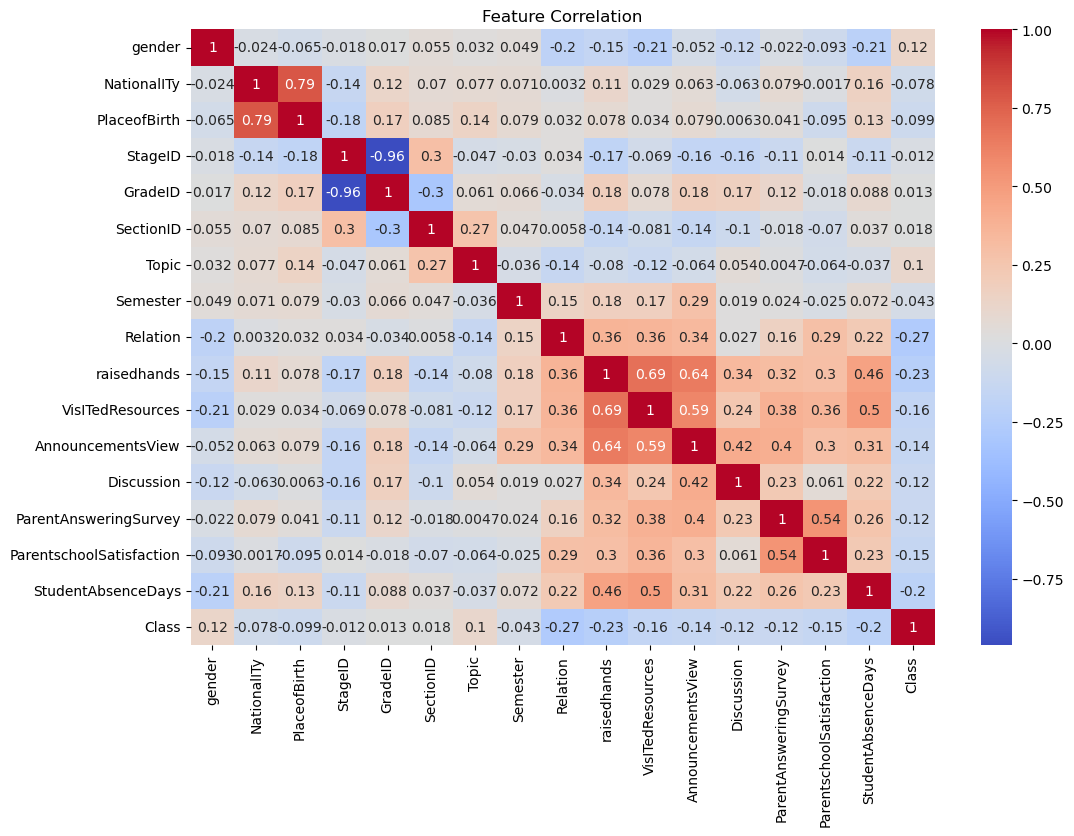

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

✔ **Grade vs Gender**

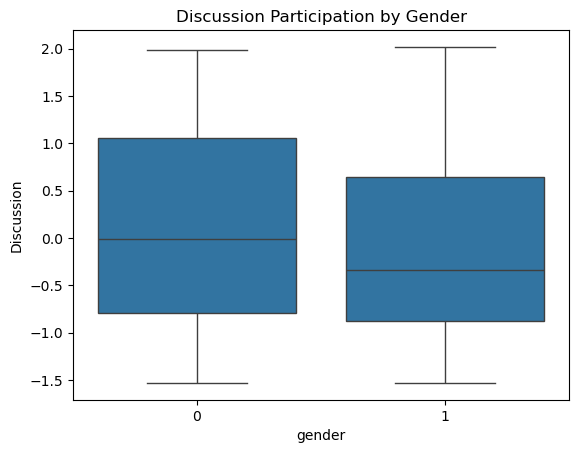

In [11]:
sns.boxplot(x='gender', y='Discussion', data=df)
plt.title("Discussion Participation by Gender")
plt.show()

**✔ Grade vs Absence**

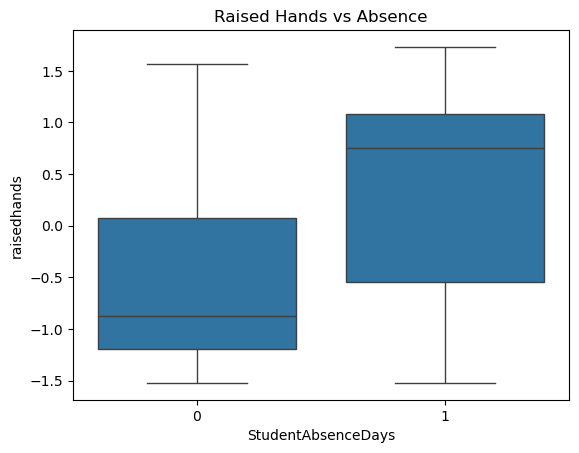

In [12]:
sns.boxplot(x='StudentAbsenceDays', y='raisedhands', data=df)
plt.title("Raised Hands vs Absence")
plt.show()